# Proyek Analisis Data: E-Commerce
- **Nama:** Darren Cahya Wijaya
- **Email:** darrencahyawijaya@gmail.com
- **ID Dicoding:** darrencw

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Analisa hubungan antara kelengkapan data produk dengan kepuasan pelanggan
- Pertanyaan 2: Analisa hubungan waktu pengiriman dengan kepuasan pelanggan

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
dfOrderItems = pd.read_csv("./data/order_items_dataset.csv", delimiter=",")
dfOrderReviews = pd.read_csv("./data/order_reviews_dataset.csv", delimiter=",")
dfOrders = pd.read_csv("./data/orders_dataset.csv", delimiter=",")
dfProducts = pd.read_csv("./data/products_dataset.csv", delimiter=",")

**Insight:**
Dari hasil Gathering Data, kita bisa melihat struktur dari setiap tabel yang diperlukan yaitu
- Tabel OrderItems memiliki field order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value
- Tabel OrderReviews memiliki field review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, review_answer_timestamp
- Tabel Orders memiliki field order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date
- Tabel Products memiliki field product_id, product_category_name, product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm

### Assessing Data

In [3]:
# Melakukan pengecekan terhadap data type
print("Ini merupakan struktur dari tiap tabel:")
print(dfOrderItems.info())
print(dfOrderReviews.info())
print(dfOrders.info())
print(dfProducts.info())
# Melakukan pengecekan terhadap invalid value
print("Ini merupakan parameter statistik tiap tabel:")
print(dfOrderItems.describe())
print(dfOrderReviews.describe())
print(dfOrders.describe())
print(dfProducts.describe())
# Melakukan pengecekan terhadap missing value:
print("Ini merupakan jumlah missing value pada tiap tabel:")
print(dfOrderItems.isnull().sum())
print(dfOrderReviews.isnull().sum())
print(dfOrders.isnull().sum())
print(dfProducts.isnull().sum())
# Melakukan pengecekan terhadap duplicate record
print("Ini merupakan jumlah duplicated record pada tiap tabel:")
print("Order Items: ", dfOrderItems.duplicated().sum())
print("Order Reviews: ",dfOrderReviews.duplicated().sum())
print("Orders: ",dfOrders.duplicated().sum())
print("Products: ",dfProducts.duplicated().sum())

Ini merupakan struktur dari tiap tabel:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2  

**Insight:**

False DataType:
- Field shipping_limit_date pada tabel OrderItems dapat di ganti datatype nya dari object menjadi datetime
- Field review_creation_date pada tabel OrderReviews dapat di ganti datatype nya dari object menjadi datetime
- Field review_answer_timestamp pada tabel OrderReviews dapat di ganti datatype nya dari object menjadi datetime
- Field order_purchase_timestamp pada tabel Orders dapat di ganti datatype nya dari object menjadi datetime
- Field order_approved_at pada tabel Orders dapat di ganti datatype nya dari object menjadi datetime
- Field order_delivered_carrier_date pada tabel Orders dapat di ganti datatype nya dari object menjadi datetime
- Field order_delivered_customer_date pada tabel Orders dapat di ganti datatype nya dari object menjadi datetime
- Field order_estimated_delivery_date pada tabel Orders dapat di ganti datatype nya dari object menjadi datetime
- Field product_name_lenght pada tabel Products dapat di ganti datatype nya dari object menjadi int64
- Field product_description_lenght pada tabel Products dapat di ganti datatype nya dari object menjadi int64
- Field product_photos_qty pada tabel Products dapat di ganti datatype nya dari object menjadi int64
- Selain itu terdapat kesalahan penulisan kata "length" pada column product_name_lenght dan product_description_lenght
Missing Value:
- Tabel OrderItems tidak memiliki missing value
- Tabel OrderReviews memiliki missing value pada field review_comment_title (87656), review_comment_message (58247)
- Tabel Orders memiliki missing value pada field order_approved_at (160), order_delivered_carrier_date (1783), order_delivered_customer_date (2965)
- Tabel Products memiliki missing value pada field product_category_name (610), product_name_lenght (610), product_description_lenght (610), product_description_lenght (610), product_photos_qty (610), product_weight_g (2), product_length_cm (2), product_height_cm (2), product_width_cm (2)

Duplicated record:
- Tidak ada record yang duplicate

### Cleaning Data

In [4]:
# Mengganti nama column yang salah
dfProducts.rename(columns={
    'product_name_lenght': 'product_name_length',
    'product_description_lenght': 'product_description_length'
}, inplace=True)
# Mengganti datatype yang salah
dfOrderItems["shipping_limit_date"] = pd.to_datetime(dfOrderItems["shipping_limit_date"])
dfOrderReviews["review_creation_date"] = pd.to_datetime(dfOrderReviews["review_creation_date"])
dfOrderReviews["review_answer_timestamp"] = pd.to_datetime(dfOrderReviews["review_answer_timestamp"])
dfOrders["order_purchase_timestamp"] = pd.to_datetime(dfOrders["order_purchase_timestamp"])
dfOrders["order_approved_at"] = pd.to_datetime(dfOrders["order_approved_at"])
dfOrders["order_delivered_carrier_date"] = pd.to_datetime(dfOrders["order_delivered_carrier_date"])
dfOrders["order_delivered_customer_date"] = pd.to_datetime(dfOrders["order_delivered_customer_date"])
dfOrders["order_estimated_delivery_date"] = pd.to_datetime(dfOrders["order_estimated_delivery_date"])
dfProducts["product_name_length"] = dfProducts["product_name_length"].fillna(0).astype(int)
dfProducts["product_description_length"] = dfProducts["product_description_length"].fillna(0).astype(int)
dfProducts["product_photos_qty"] = dfProducts["product_photos_qty"].fillna(0).astype(int)
# Mengatasi missing value
dfOrders.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)
dfOrderReviews['review_comment_title'].fillna('No Title', inplace=True)
dfOrderReviews['review_comment_message'].fillna('No Comment', inplace=True)
dfProducts['product_category_name'].fillna('No Name', inplace=True)
dfProducts['product_weight_g'].fillna(dfProducts['product_weight_g'].mean(), inplace=True)
dfProducts['product_length_cm'].fillna(dfProducts['product_length_cm'].mean(), inplace=True)
dfProducts['product_height_cm'].fillna(dfProducts['product_height_cm'].mean(), inplace=True)
dfProducts['product_width_cm'].fillna(dfProducts['product_width_cm'].mean(), inplace=True)

print(dfOrderItems.info())
print(dfOrderReviews.info())
print(dfOrders.info())
print(dfProducts.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object

C:\Users\Darryl\AppData\Local\Temp\ipykernel_2676\2875579458.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfOrderReviews['review_comment_title'].fillna('No Title', inplace=True)
C:\Users\Darryl\AppData\Local\Temp\ipykernel_2676\2875579458.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always be

**Insight:**
- Field product_name_lenght dan product_description_lenght telah direname menjadi product_name_length dan product_description_length
- Field yang memerlukan data berupa waktu juga telah diganti menjadi datetime
- Missing value telah didrop dan/atau di isi dengan menggunakan default value (0 / No Title/ No Comment/ mean())

## Exploratory Data Analysis (EDA)

### Explore

In [5]:
# Melakukan merge pada tabel orderitems, products, reviews
dfMergedOrderandProductsandReviews = pd.merge(dfOrderItems, dfProducts, how='inner', on='product_id')
dfMergedOrderandProductsandReviews = pd.merge(dfMergedOrderandProductsandReviews, dfOrderReviews, how='inner', on='order_id')
# Menampilkan data yang digroup dengan reviewscore
print(dfMergedOrderandProductsandReviews.groupby(by="review_score").agg({
    "order_id": "nunique",
    "product_description_length": ["min", "max", "mean", "std"],
    "product_photos_qty": ["min", "max", "mean", "std"]
}))

# Menambah field deliveryTime ke tabel orders
deliveryTime = dfOrders["order_delivered_customer_date"] - dfOrders["order_approved_at"]
deliveryTime = deliveryTime.apply(lambda x: x.total_seconds())
dfOrders["deliveryTime"] = round(deliveryTime / 86400)
# Melakukan merge pada tabel orders dan review
dfMergedOrderandReviews = dfOrders.merge(dfOrderReviews, on='order_id', how='left')
# Menampilkan data yang digroup dengan reviewscore
dfMergedOrderandReviews.groupby(by="review_score").agg({
    "order_id": "nunique",
    "deliveryTime": "mean"
})
# Memfilter deliveryTime
dfMergedOrderandReviews = dfMergedOrderandReviews[(dfMergedOrderandReviews['deliveryTime'] >= 0) & (dfMergedOrderandReviews['deliveryTime'] <= 50)]

             order_id product_description_length                    \
              nunique                        min   max        mean   
review_score                                                         
1               10854                          0  3992  760.772181   
2                3086                          0  3923  722.841507   
3                8107                          0  3985  763.437971   
4               19065                          0  3985  781.722027   
5               57006                          0  3992  781.899252   

                         product_photos_qty                          
                     std                min max      mean       std  
review_score                                                         
1             663.081764                  0  19  2.047348  1.672709  
2             607.690332                  0  17  2.124677  1.759397  
3             643.773000                  0  13  2.206728  1.735702  
4             646.4

**Insight:**
- Rating order di dominasi oleh skor 5 yang mana memberikan tanda kepuasan pelanggan yang cukup tinggi
- Stdev dari product_description_length cukup besar yang mana menandakan banyak produk yang tidak di deskripsikan dengan baik
- Rata-rata lama pengantaran barang memberikan pengaruh kepada rating
- Setelah mencari delivery time terdapat outlier dan kesalahan input yang menyebabkan delivery time yang tidak masuk akal (nilai negatif dan lebih dari 50 hari) sehingga saya memutuskan untuk hanya mengambil nilai yang berada diantara 0 - 50 hari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

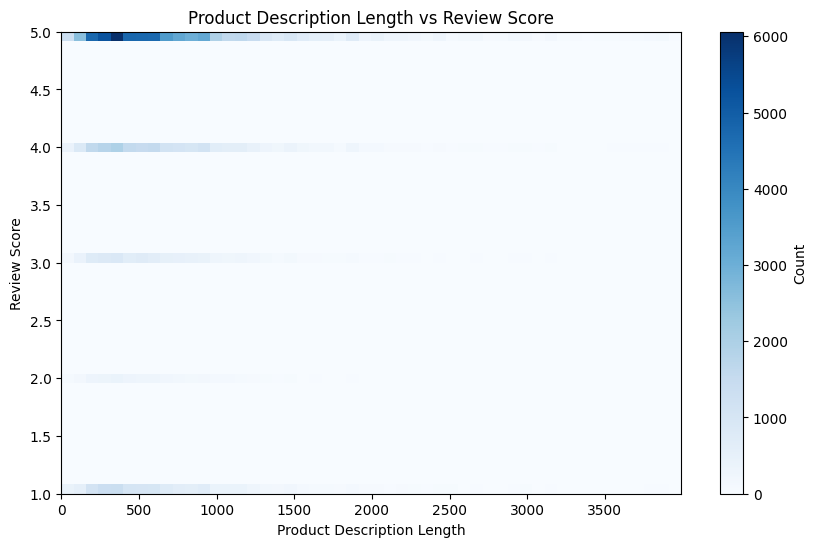

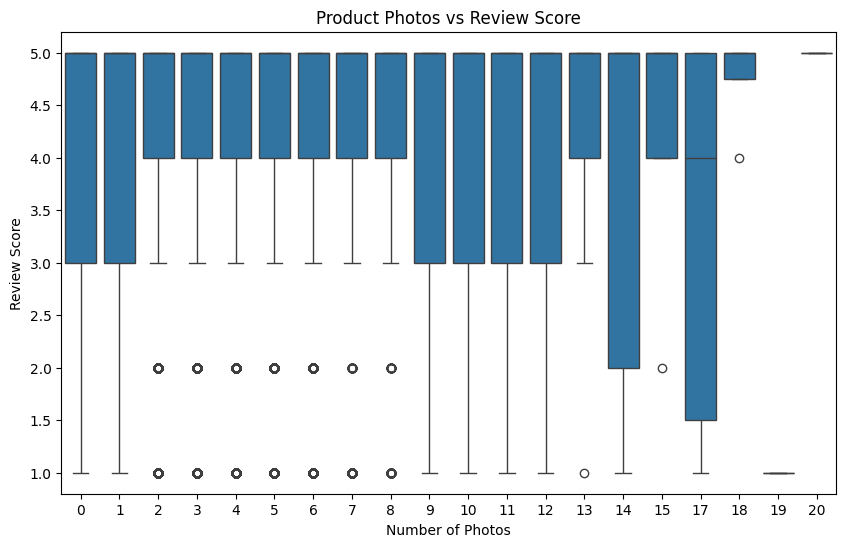

In [6]:
plt.figure(figsize=(10, 6))
plt.hist2d(dfMergedOrderandProductsandReviews['product_description_length'], dfMergedOrderandProductsandReviews['review_score'], bins=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Product Description Length vs Review Score')
plt.xlabel('Product Description Length')
plt.ylabel('Review Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=dfMergedOrderandProductsandReviews, x='product_photos_qty', y='review_score')
plt.title('Product Photos vs Review Score')
plt.xlabel('Number of Photos')
plt.ylabel('Review Score')
plt.show()

### Pertanyaan 2:

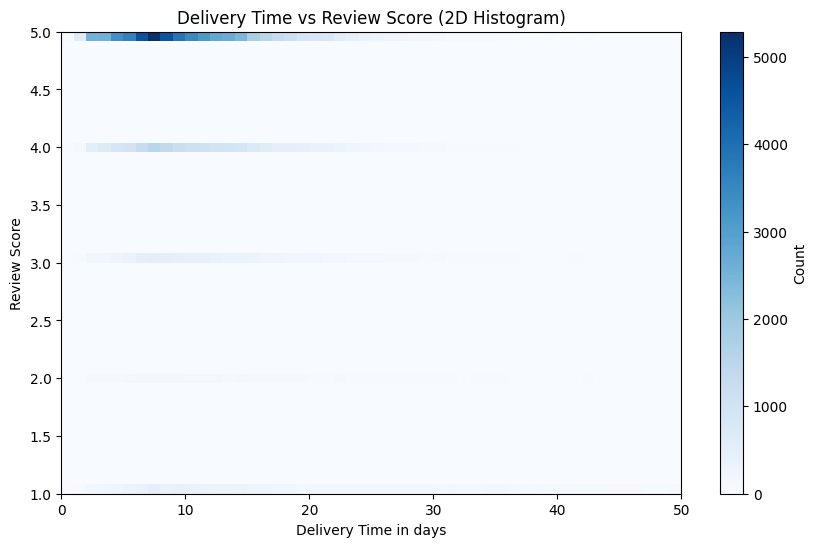

In [7]:
dfMergedOrderandReviews = dfMergedOrderandReviews.dropna(subset=['deliveryTime', 'review_score'])
plt.figure(figsize=(10, 6))
plt.hist2d(dfMergedOrderandReviews['deliveryTime'], dfMergedOrderandReviews['review_score'], bins=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title('Delivery Time vs Review Score (2D Histogram)')
plt.xlabel('Delivery Time in days')
plt.ylabel('Review Score')
plt.show()

**Insight:**
- Deskripsi produk yang memiliki rating bagus terkonsentrasi pada angka sekitar 500 huruf
- Jumlah foto produk yang memiliki rating bagus berada pada angka 2 - 8
- Waktu pengantaran barang dibawah 25 hari memiliki peluang yang lebih besar untuk mendapat rating 5 dari pelanggan

## Conclusion

- Berdasarkan hasil analisa saya meyimpulkan bahwa kualitas barang yang baik tidak selalu memiliki deskripsi yang panjang dan jumlah foto yang banyak tetapi memiliki jumlah yang ideal yaitu tidak lebih dari 500 huruf untuk deskripsi dan 2-8 foto. Kepuasan pelanggan memiliki korelasi dengan kualitas barang, semakin berkualitas barangnya semakin bagus rating yang diberikan.
- Berdasarkan hasil analisa saya meyimpulkan bahwa lama waktu pengantaran bukan satu-satunya faktor kepuasann pelanggan, tetapi waktu pengantaran dibawah 25 hari memiliki peluang yang lebih besar untuk mendapatkan rating 5. Kepuasan pelanggan memiliki korelasi dengan waktu pengantaran.

In [8]:
dfMergedOrderandProductsandReviews.to_csv('dashboard/MergedOrderandProductsandReviews.csv', index=False)
dfMergedOrderandReviews.to_csv('dashboard/MergedOrderandReviews.csv', index=False)
dfOrderReviews.to_csv('dashboard/OrderReviews.csv', index=False)